# Import Datasets

In [ ]:
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For generating TF-IDF feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import scipy.sparse as sp 
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split
# Related global settings
pd.set_option('display.max_columns', None)
sns.set()

In [ ]:
train_path = 'dbb4c4ff1f31-CAC+2022_Training+Data+Set+New (1).xlsx'
test_path = 'dbb4c4ff1f31-CAC+2022_Test+Data+Set+New.xlsx'
data_train = pd.read_excel(train_path)
data_test = pd.read_excel(test_path)

# Exploratory Data Analysis

## Data Load & Information Retrieving 

In [ ]:
data_train.head().append(data_train.tail())
# check the extreme value, mean and variance of data
data_train.describe()
# check the type and amount of data
data_train.info()

,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 O...,6300.0,58.34,D,Card,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,"CHECK CRD PURCHASE 11/11 SURETY SOLUTIONS, ...",NaN,103.00,D,Card,Check Card,False,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,CHECK CRD PURCHASE 11/11 THE COPY STOP ...,NaN,22.44,D,Card,Check Card,False,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,MARKET ALERT INC 111-111-1111 TX,7375.0,22.44,NaN,Card,Credit Card,False,MARKET ALERT INC,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,CHECK CRD PURCHASE 11/11 PERT- NER PERFECT ...,NaN,66.25,D,Card,Check Card,False,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance
39995,HH,T20130726991321130015959,CHECK CRD PURCHASE 11/11 ALLIED FIDELITY SE ...,NaN,100.00,D,Card,Check Card,False,ALLIED FIDELITY SE,111-111-1111 KS,Fidelity Investments,Fidelity Investments,Finance
39996,HH,T201208319925685298,CHECK CRD PURCHASE 11/11 FOREMOST INSURANCE ...,NaN,184.78,D,Card,Check Card,False,FOREMOST INSURANCE,111-1111111 MI,Foremost Insurance,Foremost Insurance,Finance
39997,HH,T20111004560028307,"CHECK CRD PURCHASE 11/11 PROPAY USA- ProPay, I...",7399.0,9.95,D,Card,Check Card,False,"PROPAY USA- ProPay, In",111-1111111 UT,Propay,Propay,Finance
39998,HH,T20110601320040304,CHECK CRD PURCHASE 11/11 COWBOY FINANCE LLC ...,6051.0,250.00,D,Card,Check Card,False,COWBOY FINANCE LLC,111-1111111 NM,Cowboy Finance,Cowboy Finance,Finance
39999,HH,T201208319925581644,CHECK CRD PURCHASE 11/11 JONJON DELI GROCER ...,NaN,14.49,D,Card,Check Card,False,JONJON DELI GROCER,BRONX NY,Deli Grocer,Deli Grocer,Finance


,merchant_cat_code,amt
count,24691.000000,40000.000000
mean,6263.878134,75.870519
std,1217.403683,254.587351
min,0.000000,0.010000
25%,5699.000000,14.007500
50%,5814.000000,29.990000
75%,7230.000000,63.650000
max,9405.000000,23313.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sor                         40000 non-null  object 
 1   cdf_seq_no                  40000 non-null  object 
 2   trans_desc                  40000 non-null  object 
 3   merchant_cat_code           24691 non-null  float64
 4   amt                         40000 non-null  float64
 5   db_cr_cd                    39688 non-null  object 
 6   payment_reporting_category  40000 non-null  object 
 7   payment_category            40000 non-null  object 
 8   is_international            40000 non-null  bool   
 9   default_brand               40000 non-null  object 
 10  default_location            39994 non-null  object 
 11  qrated_brand                36673 non-null  object 
 12  coalesced_brand             40000 non-null  object 
 13  Category                    400

## Dataframe Data Conclusion

In [ ]:
# Numerical variables
numeric_features = data_train.select_dtypes(include=[np.number])
numeric_features.head()

,merchant_cat_code,amt
0,6300.0,58.34
1,NaN,103.00
2,NaN,22.44
3,7375.0,22.44
4,NaN,66.25


In [ ]:
# Categorical variables
cate_features = data_train.select_dtypes(include=[np.object])
cate_features.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,sor,cdf_seq_no,trans_desc,db_cr_cd,payment_reporting_category,payment_category,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 O...,D,Card,Debit Card,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,"CHECK CRD PURCHASE 11/11 SURETY SOLUTIONS, ...",D,Card,Check Card,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,CHECK CRD PURCHASE 11/11 THE COPY STOP ...,D,Card,Check Card,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,MARKET ALERT INC 111-111-1111 TX,NaN,Card,Credit Card,MARKET ALERT INC,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,CHECK CRD PURCHASE 11/11 PERT- NER PERFECT ...,D,Card,Check Card,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance


In [ ]:
# Bool features
bool_features = data_train.select_dtypes(include='bool')
bool_features.head()

,is_international
0,False
1,False
2,False
3,False
4,False


In [ ]:
# Column names by feature types
num_cols = numeric_features.columns.tolist()
print('Numerical: ' ,num_cols)

cate_cols = cate_features.columns.tolist()
print('Categorical: ' ,cate_cols)

bool_cols = bool_features .columns.tolist()
print('Bool: ', bool_cols)

Numerical:  ['merchant_cat_code', 'amt']
Categorical:  ['sor', 'cdf_seq_no', 'trans_desc', 'db_cr_cd', 'payment_reporting_category', 'payment_category', 'default_brand', 'default_location', 'qrated_brand', 'coalesced_brand', 'Category']
Bool:  ['is_international']


## Preliminary Data Cleaning

**Drop columns:**
1.  `qrated_brand` : This features is highly consistent with `coalesced_brand`. And its missing rate is 8.33%.
2.   `merchant_cat_code` : The missing rate of this feature is 38.04%.
3.  `sor`, `cdf_seq_no`, and `payment_reporting_category`: The category distributions of these features are extremely skewed

**Drop rows:**

There are only 6 rows in training set with null `default_location`, so these rows are dropped.

**Clean up through regex**:

 The `trans_desc` feaure includes the content of `default_location` and `default_brand`, so the duplicate info is removed

In [ ]:
# check number of entries, missing, and distinct values
data = pd.concat([data_train, data_test])
cols = bool_cols + cate_cols + num_cols
tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp

,count,missing_rate,nunique
is_international,50000,0.00000,2
sor,50000,0.00000,2
cdf_seq_no,50000,0.00000,50000
trans_desc,50000,0.00000,50000
db_cr_cd,49622,0.00756,2
payment_reporting_category,50000,0.00000,1
payment_category,50000,0.00000,5
default_brand,50000,0.00000,49671
default_location,49994,0.00012,9340
qrated_brand,45836,0.08328,41814


In [ ]:
# Data distribution for cate_cols
for col in cate_cols:
    col
    data_train[col].value_counts()

'sor'

HH    39688
BK      312
Name: sor, dtype: int64

'cdf_seq_no'

T20110701260061756         1
T20110705320051436         1
T201302289909027524        1
T201302289919046401        1
T20110906320071328         1
                          ..
T20111101320064628         1
T20110706320108518         1
T20120106320069590         1
T2013072699009380111414    1
T201208319925581644        1
Name: cdf_seq_no, Length: 40000, dtype: int64

'trans_desc'

RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 OF  111-1111111   AR 111111XXXXXX1111 111111111111111                               ?MCC=1111 11    1
CHECK CRD PURCHASE 11/11 HOTEL WINDSOR SAVOIA    ASSISI        IT 111111XXXXXX1111 111111111111111                               ?MCC=1111 11    1
CHECK CRD PURCHASE 11/11 POINT ARENA GENERA      POINT ARENA   CA 111111XXXXXX1111 111111111111111                               ?MCC=1111       1
CHECK CRD PURCHASE 11/11 Daily Grind             STILLWATER    MN 111111XXXXXX1111 111111111111111                               ?MCC=1111       1
CHECK CRD PURCHASE 11/11 MT FUJI JAPANESE S      DENVER        CO 111111XXXXXX1111 111111111111111                               ?MCC=1111 11    1
                                                                                                                                                ..
CHECK CRD PURCHASE 11/11 PARLOR NEWS COFFEE SHO  111-1111111   WY 111111XXXXXX1111 111111111111111                    

'db_cr_cd'

D    37962
C     1726
Name: db_cr_cd, dtype: int64

'payment_reporting_category'

Card    40000
Name: payment_reporting_category, dtype: int64

'payment_category'

Check Card     36986
Debit Card      2303
HSA Card         382
Credit Card      312
Card              17
Name: payment_category, dtype: int64

'default_brand'

LIVINGSOCIAL*             3
WALGREENS #1111           3
CVS PHARMACY #1111        3
CHERRY CREEK MEDICAL W    2
SANTA FE KINO             2
                         ..
SAGOLA MINI MART          1
EL FRIDA PRODUCE          1
REDBARN GUY               1
BON-TON-GALLERIA #        1
JONJON DELI GROCER        1
Name: default_brand, Length: 39791, dtype: int64

'default_location'

111-111-1111 CA    860
PHOENIX AZ         664
111-1111111 CA     500
TUCSON AZ          479
111-111-1111 AZ    454
                  ... 
CARBONDALE IL        1
Concord CA           1
NEW CASTLE CO        1
Lewiston ID          1
FAIRVIEW NJ          1
Name: default_location, Length: 8201, dtype: int64

'qrated_brand'

Bp                       78
Ace Hardware             74
Google.com               73
Kfc                      46
Amazon                   46
                         ..
Vintropolis               1
Matts Classic Bowties     1
Valsan Sales              1
Concepts Hair Salon       1
Deli Grocer               1
Name: qrated_brand, Length: 33763, dtype: int64

'coalesced_brand'

Bp                             78
Ace Hardware                   74
Google.com                     73
Amazon                         46
Kfc                            46
                               ..
Total Eye Care                  1
Ds Fitness Designed 4 Women     1
My Three Sons                   1
Cape                            1
Deli Grocer                     1
Name: coalesced_brand, Length: 37050, dtype: int64

'Category'

Retail Trade                                 13500
Entertainment                                11255
Trade, Professional and Personal Services     5275
Health and Community Services                 4157
Services to Transport                         2317
Travel                                        1489
Property and Business Services                1095
Education                                      445
Communication Services                         282
Finance                                        185
Name: Category, dtype: int64

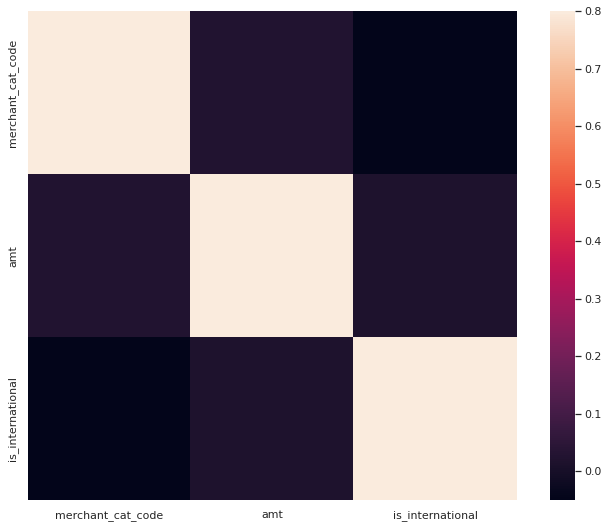

In [ ]:
# Convariance Matrix for num_cols
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# Drop some columns
data_train = data_train.drop(labels=['qrated_brand','merchant_cat_code','sor','cdf_seq_no','payment_reporting_category'], axis=1)
data_train

,trans_desc,amt,db_cr_cd,payment_category,is_international,default_brand,default_location,coalesced_brand,Category
0,RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 O...,58.34,D,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Finance
1,"CHECK CRD PURCHASE 11/11 SURETY SOLUTIONS, ...",103.00,D,Check Card,False,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Finance
2,CHECK CRD PURCHASE 11/11 THE COPY STOP ...,22.44,D,Check Card,False,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,Finance
3,MARKET ALERT INC 111-111-1111 TX,22.44,NaN,Credit Card,False,MARKET ALERT INC,111-111-1111 TX,Market Alert,Finance
4,CHECK CRD PURCHASE 11/11 PERT- NER PERFECT ...,66.25,D,Check Card,False,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Finance
...,...,...,...,...,...,...,...,...,...
39995,CHECK CRD PURCHASE 11/11 ALLIED FIDELITY SE ...,100.00,D,Check Card,False,ALLIED FIDELITY SE,111-111-1111 KS,Fidelity Investments,Finance
39996,CHECK CRD PURCHASE 11/11 FOREMOST INSURANCE ...,184.78,D,Check Card,False,FOREMOST INSURANCE,111-1111111 MI,Foremost Insurance,Finance
39997,"CHECK CRD PURCHASE 11/11 PROPAY USA- ProPay, I...",9.95,D,Check Card,False,"PROPAY USA- ProPay, In",111-1111111 UT,Propay,Finance
39998,CHECK CRD PURCHASE 11/11 COWBOY FINANCE LLC ...,250.00,D,Check Card,False,COWBOY FINANCE LLC,111-1111111 NM,Cowboy Finance,Finance


In [ ]:
# Do the same thing for testing dataset
data_test = data_test.drop(labels=['qrated_brand','merchant_cat_code','sor','cdf_seq_no','payment_reporting_category'], axis=1)
data_test

,trans_desc,amt,db_cr_cd,payment_category,is_international,default_brand,default_location,coalesced_brand,Category
0,CHECK CRD PURCHASE 11/11 PACKAGE EXPRESS ...,10.35,D,Check Card,False,PACKAGE EXPRESS,LACEY WA,Package Express,NaN
1,RECUR DEBIT CRD PMT11/11 YP *FRMLY AT&T AD ...,36.00,D,Debit Card,False,YP *FRMLY AT&T AD,111-111-1111 CA,At And T,NaN
2,CHECK CRD PURCHASE 11/11 NORMAN G JENSEN IN ...,27.00,D,Check Card,False,NORMAN G JENSEN IN,111-1111111 MN,Norman G Jensen,NaN
3,CHECK CRD PUR RTRN 11/11 TWILIO ...,20.00,C,Check Card,False,TWILIO,SAN FARANSICO CA,Twilio,NaN
4,CHECK CRD PURCHASE 11/11 AT&T D11K 1111 ...,325.78,D,Check Card,False,AT&T D11K 1111,FORT WORTH TX,At And T,NaN
...,...,...,...,...,...,...,...,...,...
9995,CHECK CRD PURCHASE 11/11 VOLCANO VILLAGE LO ...,362.94,D,Check Card,False,VOLCANO VILLAGE LO,111-111-1111 IL,Volcano Village Lodge,NaN
9996,CHECK CRD PURCHASE 11/11 LA QUINTAPHOENIX ...,100.00,D,Check Card,False,LA QUINTAPHOENIX,111-111-1111 AZ,La Quinta By Wyndham Springfield Il,NaN
9997,CHECK CRD PURCHASE 11/11 G VALLEY RANCH HOTEL ...,56.48,D,Check Card,False,G VALLEY RANCH HOTEL F,HENDERSON NV,Green Valley Ranch Resort Spa And Casino,NaN
9998,CHECK CRD PURCHASE 11/11 CITY OF ONTARIO-RE ...,276.95,D,Check Card,False,CITY OF ONTARIO-RE,ONTARIO CA,City Of Ontario,NaN


In [ ]:
# Drop rows
data_train.drop(data_train[data_train['default_location'].isnull()].index, inplace=True)
data_test.drop(data_test[data_test['default_location'].isnull()].index, inplace=True)

In [ ]:
# Remove duplicate info in trans_desc
import re
def replace_str(trans_desc, dafault_locatoin):
    trans_desc = re.sub('\s+',' ',trans_desc)
#     print(dafault_locatoin)
    if str(dafault_locatoin).upper() in trans_desc:
        trans_desc = re.sub('\s+',' ',trans_desc.replace(str(dafault_locatoin).upper(),''))
    return trans_desc
        
    
data_train['trans_desc']=data_train.apply(lambda x: replace_str(x['trans_desc'],x['default_location']), axis=1)
data_train['trans_desc']=data_train.apply(lambda x: replace_str(x['trans_desc'],x['default_brand']), axis=1)

In [ ]:
data_train['trans_desc'][0]

'RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 111111111111111 ?MCC=1111 11'

In [ ]:
# Do the same thing for testing dataset
data_test['trans_desc']=data_test.apply(lambda x: replace_str(x['trans_desc'],x['default_location']), axis=1)
data_test['trans_desc']=data_test.apply(lambda x: replace_str(x['trans_desc'],x['default_brand']), axis=1)

##  Check Distribution & Outliers

### Labels

In [ ]:
encoder=LabelEncoder()
y_train = data_train['Category']
y_train_encoded = encoder.fit_transform(y_train)
data_train['Category_encoded'] = y_train_encoded
data_train.head(5)

,trans_desc,amt,db_cr_cd,payment_category,is_international,default_brand,default_location,coalesced_brand,Category,Category_encoded
0,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 1111...,58.34,D,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Finance,3
1,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,103.00,D,Check Card,False,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Finance,3
2,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,22.44,D,Check Card,False,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,Finance,3
3,,22.44,NaN,Credit Card,False,MARKET ALERT INC,111-111-1111 TX,Market Alert,Finance,3
4,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,66.25,D,Check Card,False,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Finance,3


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text major ticklabel objects>)

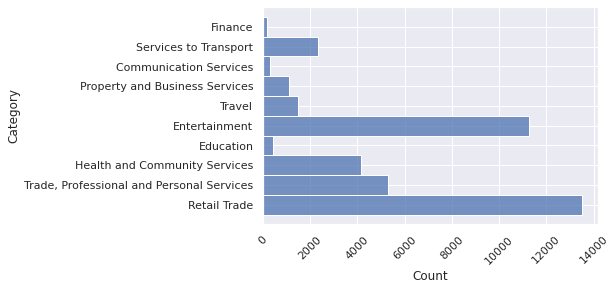

In [ ]:
# Generate a histplot
sns.histplot(y=y_train)
plt.xticks(rotation = 45)

### Numerical Features

*   The `merchant_cat_code` has been droppped, so only look into the `amt`.
*   Check skewness and kurtosis of the distributions of the training and test set, if they did not match, consider a distribution transformation.
*   Skip this step because they show consistency with each other.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


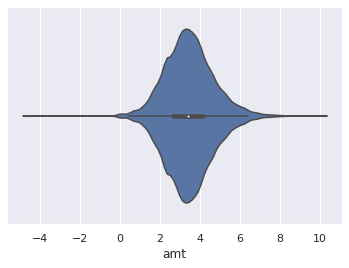

In [ ]:
# Check the outliers of numerical feature: amt
sns.violinplot(np.log(data_train['amt']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


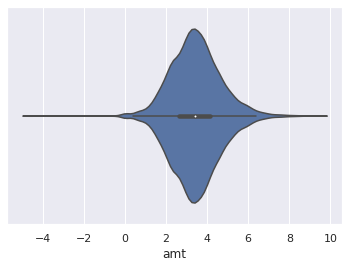

In [ ]:
sns.violinplot(np.log(data_test['amt']))

In [ ]:
# tmp = pd.DataFrame(index = num_cols)
# for col in num_cols:
#     tmp.loc[col, 'train_Skewness'] = data_train[col].skew()
#     tmp.loc[col, 'test_Skewness'] = data_test[col].skew()
#     tmp.loc[col, 'train_Kurtosis'] = data_train[col].kurt()
#     tmp.loc[col, 'test_Kurtosis'] = data_test[col].kurt()
# tmp

## Correlation Analysis

For feature selection, find features with high correlation with the target variable by generating barplots. It shows that the following features have high correlation with the target: 
* `amt`: Transaction amount
* `is_international`: If it is an international transaction
* `payment_category`: Debit Card, HSA Card, Credit Card, or Card    
* `trans_desc`: Description text of the transaction (after cleaning)
* `default_brand`: Brand name (default) of the transaction
* `default_location`: Location of the transaction
* `coalesced_brand`: Brand name (coalesced) of the transaction

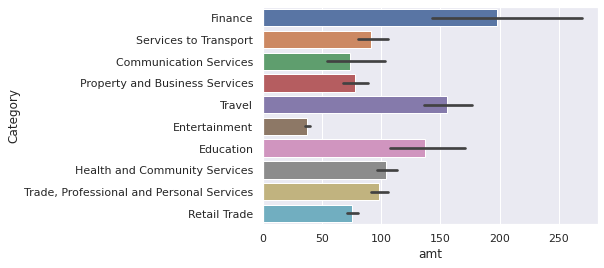

In [ ]:
sns.barplot(x='amt',y='Category',data=data_train)

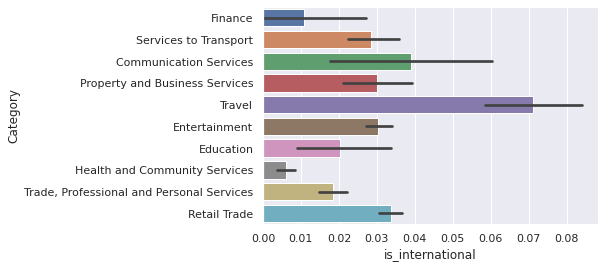

In [ ]:
sns.barplot(x='is_international',y='Category',data=data_train)

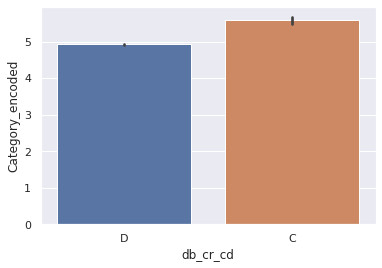

In [ ]:
sns.barplot(x='db_cr_cd',y='Category_encoded',data=data_train)

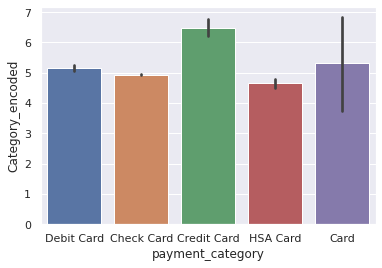

In [ ]:
sns.barplot(x='payment_category',y='Category_encoded',data=data_train)

In [ ]:
train = data_train[['amt','is_international','payment_category','trans_desc','default_brand','default_location','coalesced_brand','Category_encoded']]
train.head(5)

,amt,is_international,payment_category,trans_desc,default_brand,default_location,coalesced_brand,Category_encoded
0,58.34,False,Debit Card,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 1111...,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,3
1,103.00,False,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,3
2,22.44,False,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,3
3,22.44,False,Credit Card,,MARKET ALERT INC,111-111-1111 TX,Market Alert,3
4,66.25,False,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,3


In [ ]:
test = data_test[['amt','is_international','payment_category','trans_desc','default_brand','default_location','coalesced_brand']]
test.head(5)

,amt,is_international,payment_category,trans_desc,default_brand,default_location,coalesced_brand
0,10.35,False,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,PACKAGE EXPRESS,LACEY WA,Package Express
1,36.00,False,Debit Card,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 1111...,YP *FRMLY AT&T AD,111-111-1111 CA,At And T
2,27.00,False,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,NORMAN G JENSEN IN,111-1111111 MN,Norman G Jensen
3,20.00,False,Check Card,CHECK CRD PUR RTRN 11/11 111111XXXXXX1111 1111...,TWILIO,SAN FARANSICO CA,Twilio
4,325.78,False,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,AT&T D11K 1111,FORT WORTH TX,At And T


# Feature Engineering

## Check Missing Values

In [ ]:
data1 = pd.concat([train, test])
cols = ['amt','is_international','payment_category','trans_desc','default_brand','default_location','coalesced_brand']
tmp1 = pd.DataFrame()
tmp1['count'] = data1[cols].count().values
tmp1['missing_rate'] = (data1.shape[0] - tmp1['count']) / data1.shape[0]
tmp1['nunique'] = data1[cols].nunique().values
tmp1.index = cols
tmp1

,count,missing_rate,nunique
amt,49994,0.0,12415
is_international,49994,0.0,2
payment_category,49994,0.0,5
trans_desc,49994,0.0,2524
default_brand,49994,0.0,49665
default_location,49994,0.0,9340
coalesced_brand,49994,0.0,45919


## Feature Encoding

### Boolean Features

In [ ]:
m1 = {False:0,True:1}
train['is_international']=train['is_international'].apply(lambda x:m1[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test['is_international']=test['is_international'].apply(lambda x:m1[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.head(3)

,amt,is_international,payment_category,trans_desc,default_brand,default_location,coalesced_brand,Category_encoded
0,58.34,0,Debit Card,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 1111...,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,3
1,103.00,0,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,3
2,22.44,0,Check Card,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,3


### Categorical Features

In [ ]:
m2 = {label: idx for idx, label in enumerate(np.unique(train['payment_category']))}
print(m2)
train['payment_category']=train['payment_category'].apply(lambda x:m2[x])
test['payment_category']=test['payment_category'].apply(lambda x:m2[x])
train.head(3)

{'Card': 0, 'Check Card': 1, 'Credit Card': 2, 'Debit Card': 3, 'HSA Card': 4}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,amt,is_international,payment_category,trans_desc,default_brand,default_location,coalesced_brand,Category_encoded
0,58.34,0,3,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 1111...,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,3
1,103.00,0,1,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,3
2,22.44,0,1,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 1111...,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,3


## Text Data Cleaning

Observing the data, there exists `111111XXXXXX1111 111111111111111 ?MCC=1111 11` for every records of the `trans_desc` column, so we remove the meaningless text.

In [ ]:
train['trans_desc'] = train['trans_desc'].apply(lambda x:str(x).replace('111111XXXXXX1111 111111111111111 ?MCC=1111',''))
test['trans_desc']=train['trans_desc'].apply(lambda x:str(x).replace('111111XXXXXX1111 111111111111111 ?MCC=1111 11',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pd.set_option('max_colwidth',200)
train.head(3)

,amt,is_international,payment_category,trans_desc,default_brand,default_location,coalesced_brand,Category_encoded
0,58.34,0,3,RECUR DEBIT CRD PMT11/11 11,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,3
1,103.00,0,1,CHECK CRD PURCHASE 11/11,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,3
2,22.44,0,1,CHECK CRD PURCHASE 11/11,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,3


## Text Features Extraction

For the text features including `trans_desc`,  `default_brand`，`default_location`，`coalesced_brand`, vectorize them into sparse matrices based on TF-IDF model

In [ ]:
cut = lambda x:str(x).split(' ')
trans_desc_cuts = train['trans_desc'].apply(lambda x: ' '.join(cut(x)))
trans_desc_encoder = TfidfVectorizer(max_df=0.99, min_df=0.01)
trans_desc_vec = trans_desc_encoder.fit_transform((d for d in trans_desc_cuts))
trans_desc_vec

<39994x9 sparse matrix of type '<class 'numpy.float64'>'
	with 121679 stored elements in Compressed Sparse Row format>

In [ ]:
default_brand_cuts = train['default_brand'].apply(lambda x: ' '.join(cut(x)))
default_brand_encoder = TfidfVectorizer(max_df=0.99, min_df=0.01)
default_brand_vec = default_brand_encoder.fit_transform((d for d in default_brand_cuts))
default_brand_vec

<39994x14 sparse matrix of type '<class 'numpy.float64'>'
	with 9675 stored elements in Compressed Sparse Row format>

In [ ]:
default_location_cuts = train['default_location'].apply(lambda x: ' '.join(cut(x)))
default_location_encoder = TfidfVectorizer(max_df=0.99, min_df=0.01)
default_location_vec = default_location_encoder.fit_transform((d for d in default_location_cuts))
default_location_vec

<39994x32 sparse matrix of type '<class 'numpy.float64'>'
	with 51341 stored elements in Compressed Sparse Row format>

In [ ]:
coalesced_brand_cuts = train['coalesced_brand'].apply(lambda x: ' '.join(cut(x)))
coalesced_brand_encoder = TfidfVectorizer(max_df=0.99, min_df=0.01)
coalesced_brand_vec = coalesced_brand_encoder.fit_transform((d for d in coalesced_brand_cuts))
coalesced_brand_vec

<39994x15 sparse matrix of type '<class 'numpy.float64'>'
	with 13645 stored elements in Compressed Sparse Row format>

In [ ]:
# Combine all TF-IDF sparse matrices
feature_tfidf = sp.hstack([trans_desc_vec,default_brand_vec,default_location_vec,coalesced_brand_vec])
feature_tfidf

<39994x70 sparse matrix of type '<class 'numpy.float64'>'
	with 196340 stored elements in COOrdinate format>

In [ ]:
# Combine all features
feature=pd.concat([train[['amt','is_international','payment_category']].reset_index(drop=True), pd.DataFrame(feature_tfidf.toarray()).reset_index(drop=True)],axis=1).reset_index(drop=True)
feature.shape

(39994, 73)

In [ ]:
# Split the training and validation data set into an 80:20 ratio
X_train, X_dev, y_train, y_dev = train_test_split(feature, train['Category_encoded'], test_size=0.2, random_state=1, stratify=train['Category_encoded'],
                                                        shuffle=True)

In [ ]:
X_train.shape

(31995, 73)

In [ ]:
X_dev.shape

(7999, 73)

# Model Training & Prediction

## 1.  TF-IDF +  Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
grid = GridSearchCV(MultinomialNB(),
                    param_grid={"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}, cv=5, verbose=1, scoring='accuracy')
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\valida

D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\soft\anaconda3\lib\site-packages\sklearn\utils\valida

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=1)

The best parameters are {'alpha': 0.01} with a score of 0.39


In [ ]:
y_train.shape

(31995,)

## 2.  TF-IDF +​ XGBoost

In [ ]:
# train the model
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=200, n_estimators=400, subsample=1, learning_rate=0.07, reg_lambda=0.1, reg_alpha=0.1, gamma=1)
clf.fit(X_train, y_train)

predictions = clf.predict(X_train)

In [ ]:
print ("Training set f1_score :", np.round(metrics.f1_score(y_train, predictions,average='micro'),5))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
def evaluate(model, x_test, y_test):
    test_mean_accuracy = model.score(x_test, y_test)
    y_scores_prob = model.predict_proba(x_test)
    y_scores = model.predict(x_test)
    auc = roc_auc_score(y_test, y_scores_prob, multi_class='ovo')
    print(f'test mean accuracy:{test_mean_accuracy}')
    # print(f'test auc:{auc}')
    print('report the summary:')
    print(classification_report(y_test, y_scores))
    return y_scores, y_scores_prob, auc

# test the model
# y_scores, y_scores_prob, auc = evaluate(clf, X_dev, y_dev)

In [ ]:
trans_desc_cuts = test['trans_desc'].apply(lambda x: ' '.join(cut(x)))
trans_desc_vec = trans_desc_encoder.transform((d for d in trans_desc_cuts))

default_brand_cuts = test['default_brand'].apply(lambda x: ' '.join(cut(x)))
default_brand_vec = default_brand_encoder.transform((d for d in default_brand_cuts))

default_location_cuts = test['default_location'].apply(lambda x: ' '.join(cut(x)))
default_location_vec = default_location_encoder.transform((d for d in default_location_cuts))

coalesced_brand_cuts = test['coalesced_brand'].apply(lambda x: ' '.join(cut(x)))
coalesced_brand_vec = coalesced_brand_encoder.transform((d for d in coalesced_brand_cuts))

feature_tfidf_test = sp.hstack([trans_desc_vec,default_brand_vec,default_location_vec,coalesced_brand_vec])
feature=pd.concat([test[['amt','is_international','payment_category']].reset_index(drop=True), pd.DataFrame(feature_tfidf_test.toarray()).reset_index(drop=True)],axis=1).reset_index(drop=True)
feature_test.shape

(10000, 73)

In [ ]:
predicts = clf.predict(feature_test).tolist()
predicts[:5]

[6, 6, 8, 4, 0]

In [ ]:
# decode the predicted labels
data_test['Category'] = encoder.inverse_transform(predicts).tolist()

In [ ]:
data_test.head(10)

,trans_desc,amt,db_cr_cd,payment_category,is_international,default_brand,default_location,coalesced_brand,Category
0,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111,10.35,D,Check Card,False,PACKAGE EXPRESS,LACEY WA,Package Express,Retail Trade
1,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 111111111111111 ?MCC=1111,36.00,D,Debit Card,False,YP *FRMLY AT&T AD,111-111-1111 CA,At And T,Retail Trade
2,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111,27.00,D,Check Card,False,NORMAN G JENSEN IN,111-1111111 MN,Norman G Jensen,"Trade, Professional and Personal Services"
3,CHECK CRD PUR RTRN 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111,20.00,C,Check Card,False,TWILIO,SAN FARANSICO CA,Twilio,Health and Community Services
4,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111,325.78,D,Check Card,False,AT&T D11K 1111,FORT WORTH TX,At And T,Communication Services
5,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111,25.00,D,Check Card,False,LIBERTY POSTAL BUS,THE COLONY TX,Liberty Postal Express,Health and Community Services
6,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111 11,41.90,D,Check Card,False,COMMSPEED L.L.C.,111-111-1111 AZ,Commspeed Internet Services,Entertainment
7,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111 11,56.87,D,Check Card,False,TELCEL HERMOSILLO V,HERMOSILLO MX,TELCEL HERMOSILLO V,Retail Trade
8,RECUR DEBIT CRD PMT11/11 111111XXXXXX1111 111111111111111 ?MCC=1111 11,60.04,D,Debit Card,False,ATT*BUS PHONE PMT,111-111-1111 TX,At And T,"Trade, Professional and Personal Services"
9,CHECK CRD PURCHASE 11/11 111111XXXXXX1111 111111111111111 ?MCC=1111 11,7.35,D,Check Card,False,USPS CPU 1,PHOENIX AZ,Usps Cpu,Retail Trade


In [ ]:
data_test.to_excel('./Test+Data+Set+New_Category.xlsx','w')

## 3.  TF-IDF + MLP Model

In [ ]:
import torch
from transformers import BertModel, BertTokenizer

In [ ]:
# train

In [ ]:
# Combine text features for encoding with bert
train['features_text'] = train['trans_desc'].map(str) + ' ' +train['default_brand'].map(str) +' '+train['default_location'].map(str)+' '+train['coalesced_brand'].map(str).tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test['features_text'] = test['trans_desc'].map(str) + ' ' +test['default_brand'].map(str) +' '+test['default_location'].map(str)+' '+test['coalesced_brand'].map(str).tolist()

In [ ]:
from tqdm import tqdm

def text2bertvec(text_list):
    # bert_path = f'{root}/bert-base-uncased'
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert = BertModel.from_pretrained('bert-base-uncased').eval().to(device)

    pad_size = 32
    batch_size = 16
    bert_embs = []
    for start_idx in tqdm(range(0, len(text_list), batch_size)):
        end_idx = start_idx + batch_size
        contents = text_list[start_idx: end_idx]
        with torch.no_grad():
            tokens = tokenizer(contents, padding='max_length', max_length=pad_size, truncation=True)
            token_ids = torch.LongTensor(tokens['input_ids']).to(device)
            mask = torch.LongTensor(tokens['attention_mask']).to(device)
            out = bert(input_ids=token_ids, attention_mask=mask, output_hidden_states=True)
            pooled = out['pooler_output']

        bert_embs.append(pooled)

    bert_embs = torch.cat(bert_embs, dim=0)
    return bert_embs.cpu().numpy()

In [ ]:
train.shape

(39682, 10)

In [ ]:
train_text_list = train['features_text'].str.lower().tolist()
train_text_vec = text2bertvec(train_text_list)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2481/2481 [01:44<00:00, 23.79it/s]


In [ ]:
test_text_list = test['features_text'].str.lower().tolist()
test_text_vec = text2bertvec(test_text_list) 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 625/625 [00:20<00:00, 30.68it/s]


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(train_features.values, train['Category_encoded'].values)
predictions = clf.predict(train_features.values)

print ("Training set f1_score :", np.round(metrics.f1_score(train['Category_encoded'].values, predictions,average='micro'),5))

MLPClassifier(max_iter=300, random_state=1)

Training set f1_score : 0.49705


## 4. BERT + MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_plus = MLPClassifier(random_state=1, max_iter=300)
clf_plus.fit(np.hstack([train_features.values, train_text_vec]), train['Category_encoded'].values)

MLPClassifier(max_iter=300, random_state=1)

In [ ]:
predictions = clf_plus.predict(np.hstack([train_features.values, train_text_vec]))

In [ ]:
print ("Training set f1_score :", np.round(metrics.f1_score(train['Category_encoded'].values, predictions,average='micro'),5))

Training set f1_score : 0.57545


In [ ]:
test_predictions = clf_plus.predict(np.hstack([test_features.values, test_text_vec]))

In [ ]:
data_test['prediction'] = test_predictions

In [ ]:
data_test.to_excel(f"{root}/prediction.xlsx")